> ## Workflow
1. Data collection and loading
2. Data cleaning
3. EDA
4. Feature Engineering
5. Feature Selection
6. Splitting Data
7. Data Preprocessing
8. Model Selection and Training
9. Model Evaluation
10. Hyperparameter Tuning
11. Model Validation
12. Model Deployment
13. Conclusion and Reporting

# 0. Introduction

### 0.1 Context
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

### 0.2 Problem definition

The question or problem definition for this Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

### 0.3 Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

### 0.4 Data dictionary

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Import libraries and load data

In [467]:
#import dependencies

# Data analysis tools
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from pandas.plotting import scatter_matrix 

# Training machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Model Evaluation
from sklearn.metrics import accuracy_score

In [406]:
#import and Load data
df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
sub_df = pd.read_csv('data/gender_submission.csv') # what a submission should look like
combine_df = [df, test_df]

print("Train data shape: ", df.shape)
print("Test data shape: ", test_df.shape)
print("Submission data shape: ", sub_df.shape)

Train data shape:  (891, 12)
Test data shape:  (418, 11)
Submission data shape:  (418, 2)


In [407]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [408]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [409]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C118,C
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S


In [410]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [412]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [413]:
# Data cleaning - duplicate data

print('shape before removing duplicates:', df.shape)

# remove duplicate data if any
duplicate_rows= df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape[0])
df = df.drop_duplicates()

print('shape after removing duplicates:', df.shape)

shape before removing duplicates: (891, 12)
number of duplicate rows:  0
shape after removing duplicates: (891, 12)


In [414]:
# Data cleaning - missing data
# handling missing data is a critical step in data cleaning because missing values can bias your results, distort statistical inferences, or cause errors in interpreting results from the analysis or machine learning
# sum of missing values in each column in a descending order

df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<Axes: >

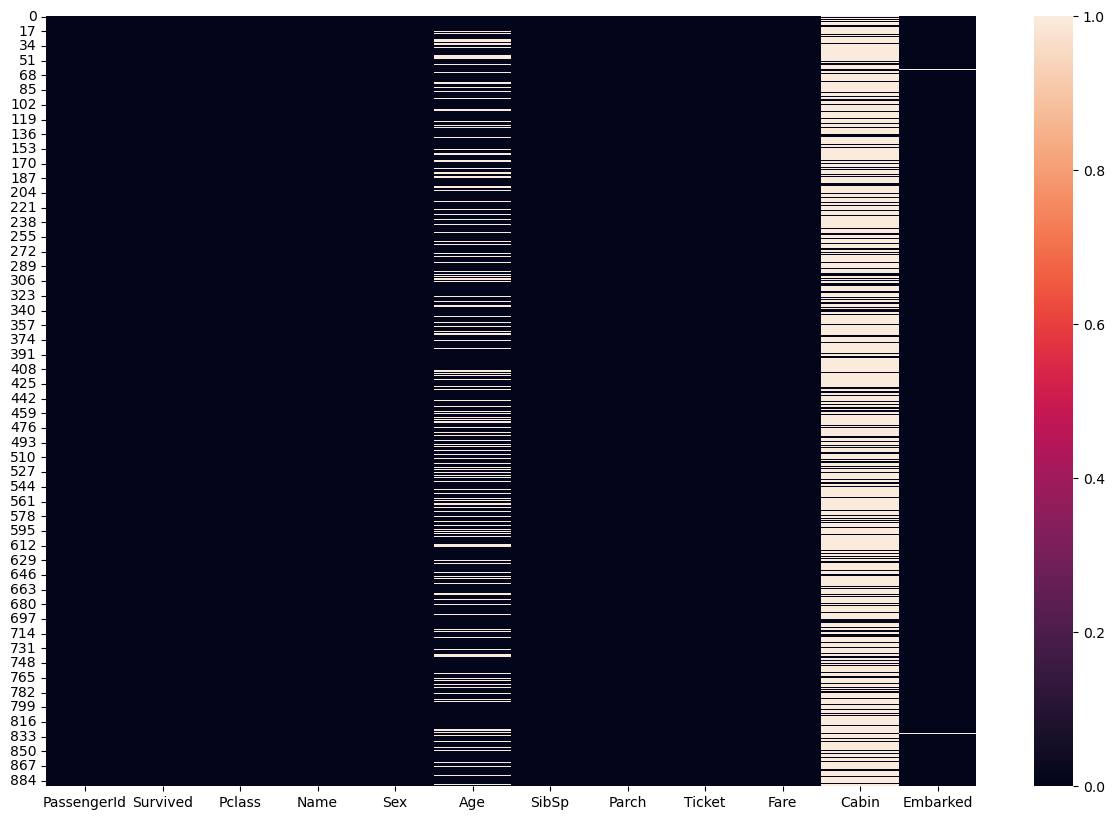

In [415]:
#Missing data visualization
plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull(), cbar=True)

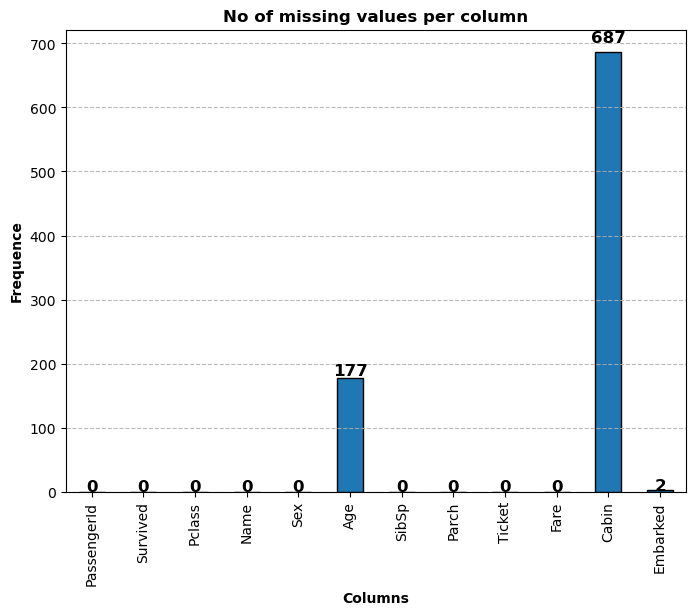

In [416]:
ax = df.isnull().sum().plot(kind="bar",  edgecolor='black', figsize=(8,6))
plt.title("No of missing values per column", fontweight='bold')
plt.xlabel("Columns", fontweight='bold')
plt.ylabel('Frequence', fontweight='bold')
# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=.85)
#Annotate the exact values on top of each bar with space (2.2% of bar height)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p. get_width() /2., p.get_height() + p.get_height() * 0.022), va='baseline', ha='center', fontweight='bold', fontsize=12, color='black')
plt.show()

In [417]:
# handling the missing values for cabin
# first, majority of the cabin data are missing so it's best if its entirely dropped

df = df.drop(columns='Cabin', axis=1)

In [418]:
# replacing the missing values in 'Embarked' column with mode value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [419]:
print('The average age is: ', df.Age.mean())
print('The median age is: ', df.Age.median())


The average age is:  29.69911764705882
The median age is:  28.0


In [420]:
median_age_sex = df.groupby('Sex')['Age'].median()
median_age_sex

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [421]:
mean_age_sex = df.groupby('Sex')['Age'].mean()
mean_age_sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [422]:
#Missing Age values based on sex 
missing_age = df[df['Age'].isnull()]
missing_by_sex = missing_age['Sex'].value_counts()
missing_by_sex

Sex
male      124
female     53
Name: count, dtype: int64

In [423]:
# replacing the missing values in 'Age' column with median age of their respective 'Sex'

df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))

In [424]:
#EDA

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [426]:
# A short note about EDA
# Will help us Answer some basic questions such as
# - Basic passenger demographics
# - Get a sense of passengers affluence, from where they came on board
# - Who was alone and who was with family
# - What factors helped someone survive sinking 


Sex
male      577
female    314
Name: count, dtype: int64


<Axes: xlabel='Sex'>

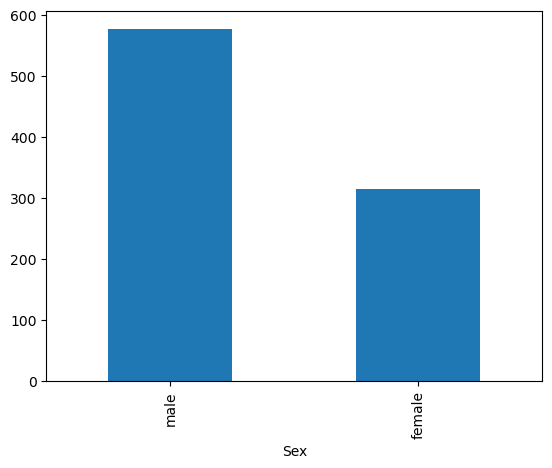

In [427]:
# Gender distribution
print(df.Sex.value_counts())
df.Sex.value_counts().plot(kind='bar')

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Pclass'>

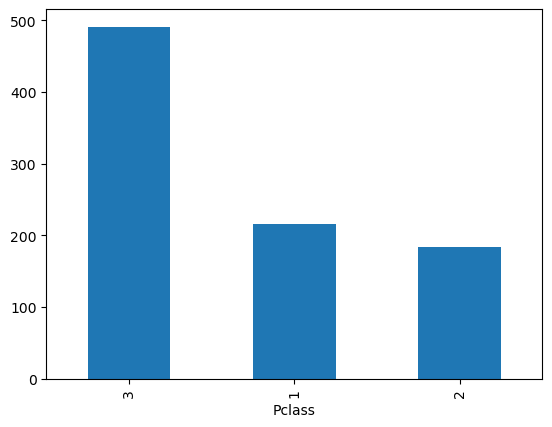

In [428]:
# Passenger Ticket class distribution  ---> pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd
print(df.Pclass.value_counts())
df.Pclass.value_counts().plot(kind='bar')

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


<Axes: xlabel='Embarked'>

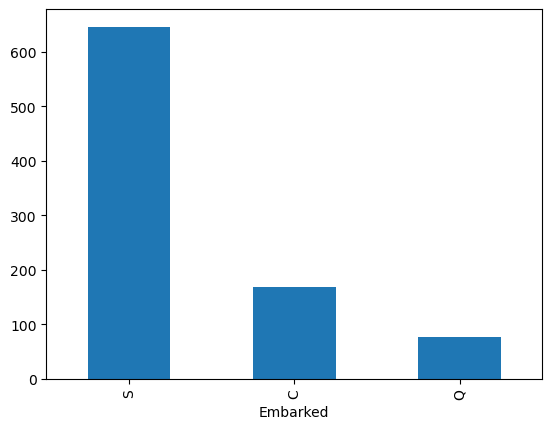

In [429]:
# Port of Embarkation Distribution ---> C = Cherbourg, Q = Queenstown, S = Southampton
print(df.Embarked.value_counts())
df.Embarked.value_counts().plot(kind='bar')


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<Axes: xlabel='SibSp'>

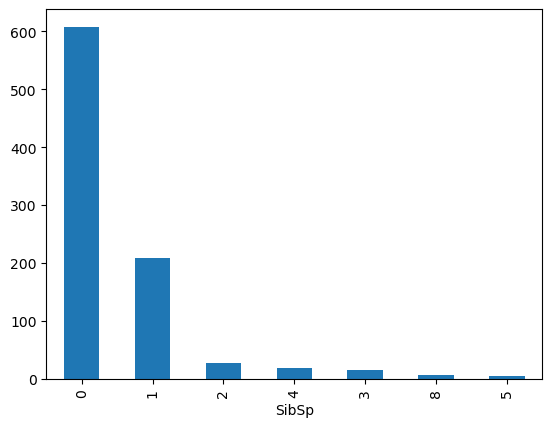

In [430]:
#number of siblings/spouses aboard the Titanic
print(df.SibSp.value_counts())
df.SibSp.value_counts().plot(kind='bar')



Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch'>

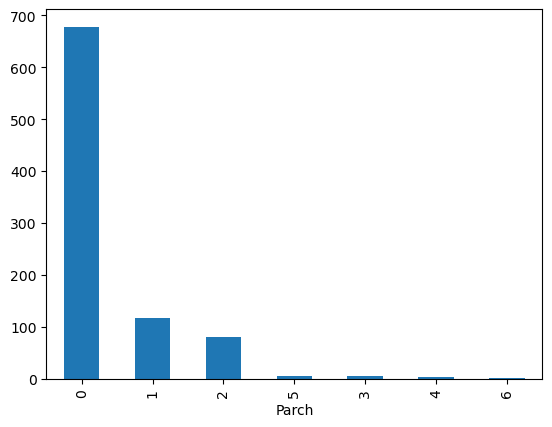

In [431]:
# number of parents/children aboard the Titanic
print(df.Parch.value_counts())
df.Parch.value_counts().plot(kind='bar')

<Axes: >

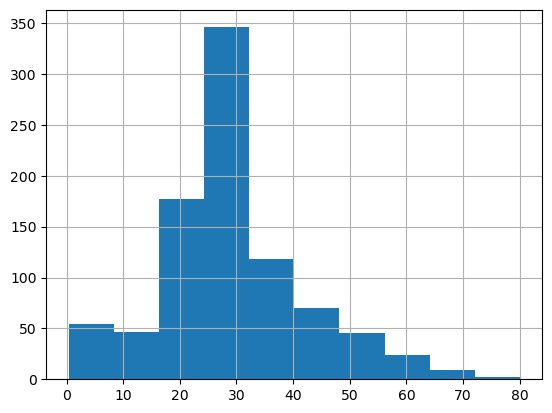

In [432]:
df.Age.hist()

In [433]:
print('The average age is: ', df.Age.mean())
print('The median age is: ', df.Age.median())
print('The most occuring age is: ',df.Age.mode())

The average age is:  29.441268237934903
The median age is:  29.0
The most occuring age is:  0    29.0
Name: Age, dtype: float64


In [434]:
#Survival Insights Across Features

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived'>

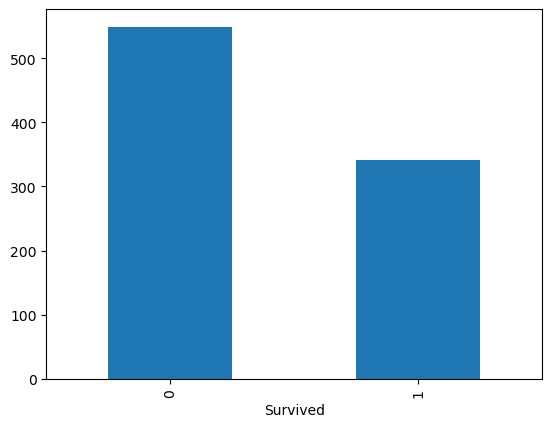

In [435]:
#Survival distribution
print(df.Survived.value_counts())
df.Survived.value_counts().plot(kind="bar")


Text(0, 0.5, 'Survival Rate')

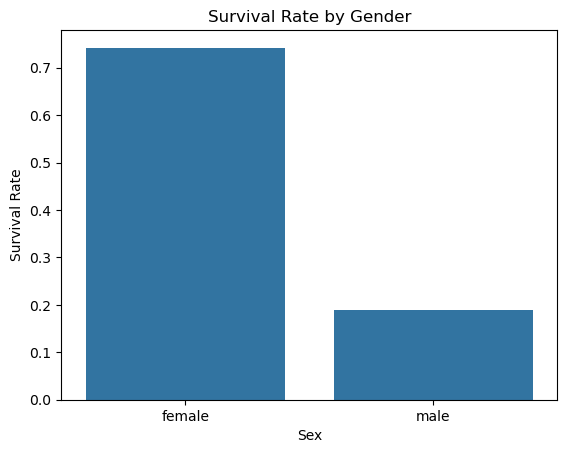

In [436]:
#survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()

#plot
sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')


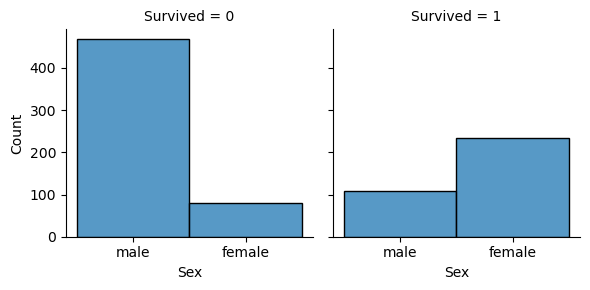

In [452]:
Sexwise = sns.FacetGrid(df, col='Survived')
Sexwise.map(sns.histplot, 'Sex')

C:\Users\USER\AppData\Local\Temp\ipykernel_8120\78821279.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean()


Text(0, 0.5, 'Survival Rate')

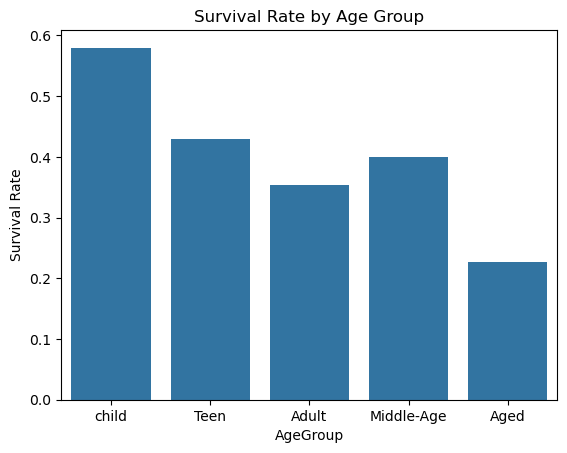

In [437]:
#survival rate by age
#Create a new feature age column
df['AgeGroup'] = pd.cut(df.Age, bins=[0, 12,18, 35, 60, 80, ], labels=['child', 'Teen', 'Adult', 'Middle-Age', 'Aged'])
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()

#plot
sns.barplot(x=age_group_survival.index, y=age_group_survival.values, )
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')

AgeGroup
Adult         535
Middle-Age    195
Teen           70
child          69
Aged           22
Name: count, dtype: int64


<Axes: xlabel='AgeGroup'>

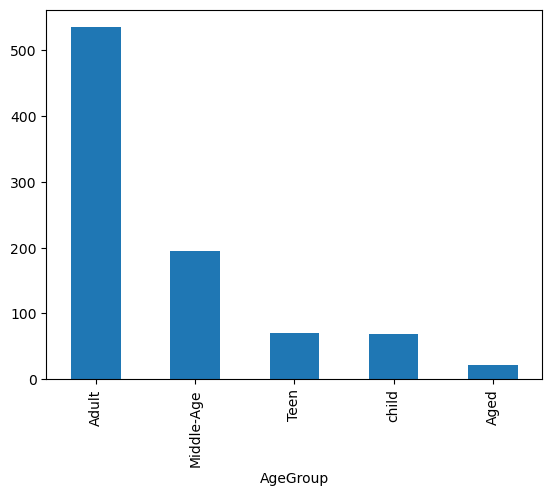

In [438]:
print(df.AgeGroup.value_counts())
df.AgeGroup.value_counts().plot(kind='bar')

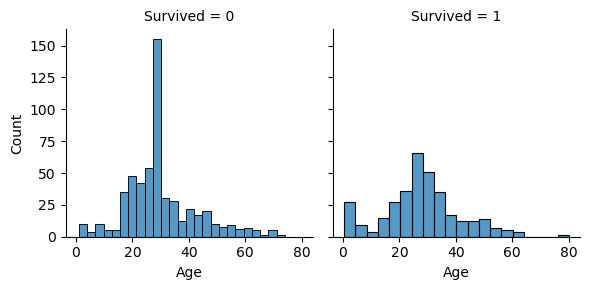

In [451]:
Agewise = sns.FacetGrid(df, col='Survived')
Agewise.map(sns.histplot, 'Age')

Text(0, 0.5, 'Survival Rate')

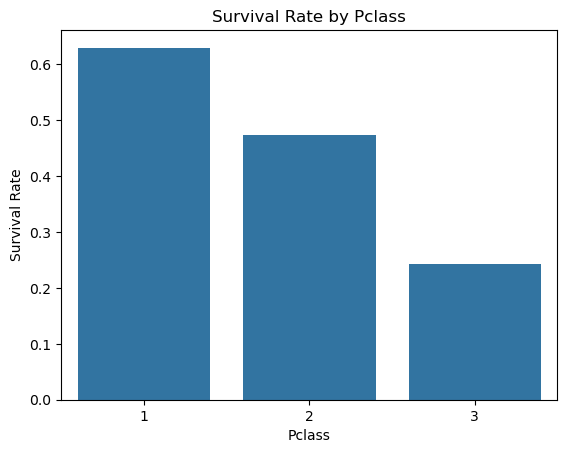

In [439]:
#survival rate by passenger class
pclass_survival = df.groupby('Pclass')['Survived'].mean()

#plot
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

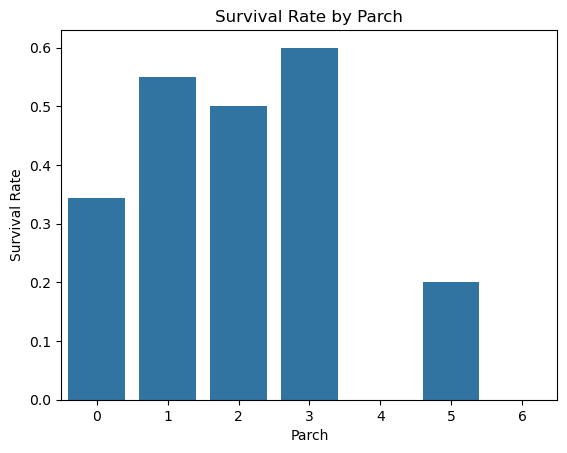

In [440]:
parch = df.groupby('Parch')['Survived'].mean()

#plot
sns.barplot(x=parch.index, y=parch.values)
plt.title('Survival Rate by Parch')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

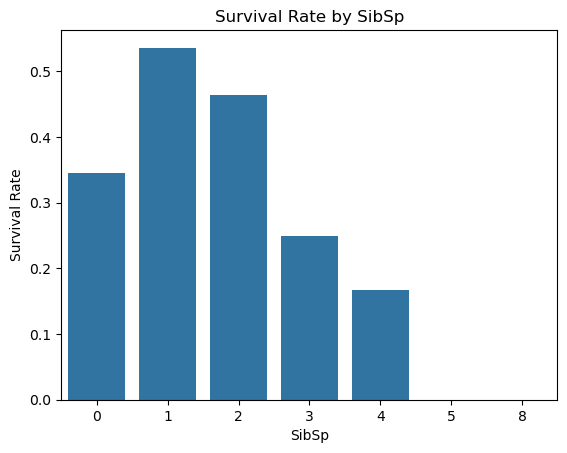

In [441]:
SibSp_survival = df.groupby('SibSp')['Survived'].mean()

#plot
sns.barplot(x=SibSp_survival.index, y=SibSp_survival.values)
plt.title('Survival Rate by SibSp')
plt.ylabel('Survival Rate')

FamilySize
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64


Text(0, 0.5, 'Survival Rate')

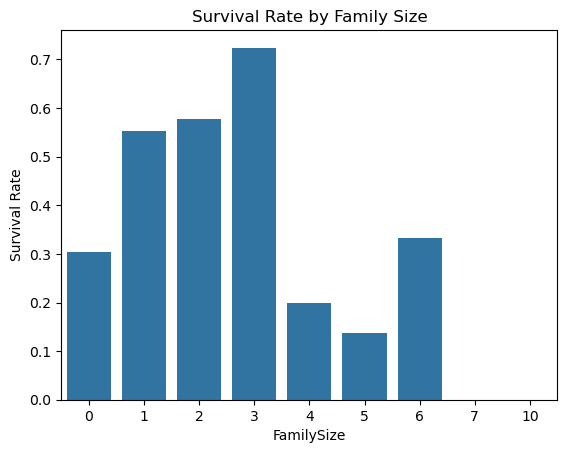

In [442]:

# Survival based on family influence (traveling with family)# #Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch']
#plot
print(df.FamilySize.value_counts())
family_size_survival = df.groupby('FamilySize')['Survived'].mean()

#plot
sns.barplot(x=family_size_survival.index, y=family_size_survival.values)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')

In [443]:
df['LoneStatus'] = df['FamilySize'].apply(lambda x: 'With Family' if x >= 1 else 'Alone')

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,LoneStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Age,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,Alone
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,Adult,0,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Middle-Age,0,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,child,4,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Adult,2,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Teen,1,With Family


LoneStatus
Alone          537
With Family    354
Name: count, dtype: int64


Text(0, 0.5, 'Survival Rate')

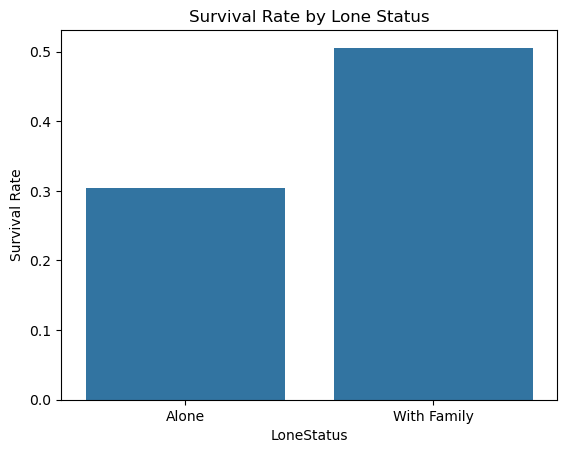

In [444]:
print(df.LoneStatus.value_counts())
lone_status_survival = df.groupby('LoneStatus')['Survived'].mean()

#plot
sns.barplot(x=lone_status_survival.index, y=lone_status_survival.values)
plt.title('Survival Rate by Lone Status')
plt.ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

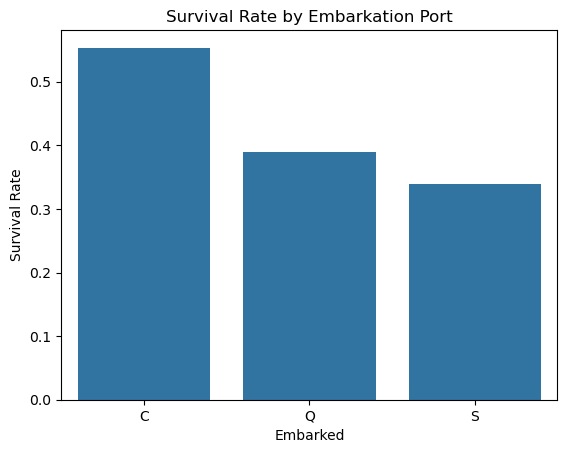

In [445]:
#survival rate by embarkation
embark_survival = df.groupby('Embarked')['Survived'].mean()

#plot
sns.barplot(x=embark_survival.index, y=embark_survival.values)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')


In [446]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,LoneStatus
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Age,1,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,Alone


In [447]:
fare_class = df.groupby('Pclass')['Fare'].mean()
fare_class

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Fare category frequency: FareCategory
0-50       716
50-100     107
100-150     24
200+        20
150-200      9
Name: count, dtype: int64
Survivalrate:  FareCategory
0-50       0.324022
50-100     0.654206
100-150    0.791667
150-200    0.666667
200+       0.700000
Name: Survived, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_8120\3568191400.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()


Text(0, 0.5, 'Survival Rate')

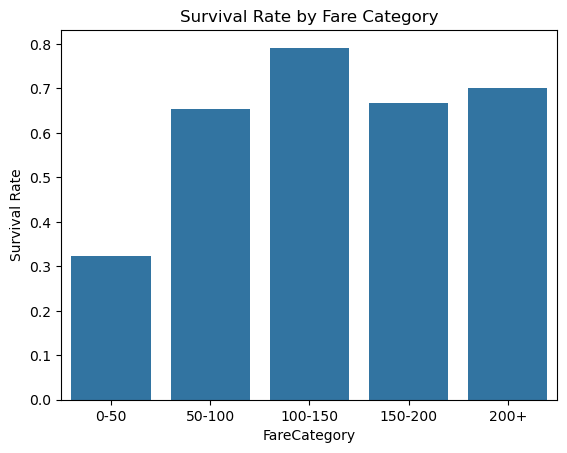

In [448]:
#Survival rate by fare category
#Create a new feature fare column
df['FareCategory'] = pd.cut(df.Fare, bins=[0, 50,100, 150, 200, df.Fare.max() ], labels=['0-50', '50-100', '100-150', '150-200', '200+'])
fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()
print('Fare category frequency:', df.FareCategory.value_counts())
print('Survivalrate: ',fare_cate_survival)

#plot
sns.barplot(x=fare_cate_survival.index, y=fare_cate_survival.values, )
plt.title('Survival Rate by Fare Category')
plt.ylabel('Survival Rate')

C:\Users\USER\AppData\Local\Temp\ipykernel_8120\1521757830.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()


Fare category frequency: FareCategory
low       823
medium     50
high        3
Name: count, dtype: int64
Survivalrate:  FareCategory
low       0.36695
medium    0.72000
high      1.00000
Name: Survived, dtype: float64


Text(0, 0.5, 'Survival Rate')

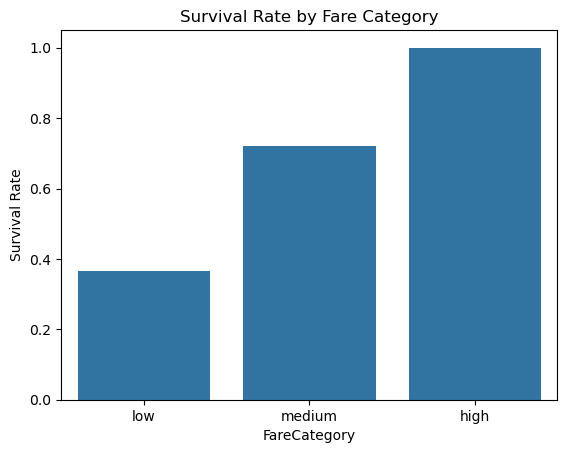

In [487]:
#Survival rate by fare category
#Create a new feature fare column
df['FareCategory'] = pd.cut(df.Fare, bins=[0, 100, 300, 550], labels=['low', 'medium', 'high'])
fare_cate_survival = df.groupby('FareCategory')['Survived'].mean()
print('Fare category frequency:', df.FareCategory.value_counts())
print('Survivalrate: ',fare_cate_survival)

#plot
sns.barplot(x=fare_cate_survival.index, y=fare_cate_survival.values, )
plt.title('Survival Rate by Fare Category')
plt.ylabel('Survival Rate')

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    object  
 11  AgeGroup      891 non-null    category
 12  FamilySize    891 non-null    int64   
 13  LoneStatus    891 non-null    object  
 14  FareCategory  876 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.7+ KB


In [449]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,LoneStatus,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1,With Family,0-50
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Age,1,With Family,50-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0,Alone,0-50
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,With Family,50-100
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,Alone,0-50


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    object  
 11  AgeGroup      891 non-null    category
 12  FamilySize    891 non-null    int64   
 13  LoneStatus    891 non-null    object  
 14  FareCategory  876 non-null    category
dtypes: category(2), float64(2), int64(6), object(5)
memory usage: 92.8+ KB


In [454]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [465]:
df.isnull().sum().sort_values(ascending = False)

FareCategory    15
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
AgeGroup         0
FamilySize       0
LoneStatus       0
dtype: int64

In [483]:
print(df.Fare.min())
print(df.Fare.max())
print(df.FareCategory.min())
print(df.FareCategory.max())

0.0
512.3292
0-50
200+


In [462]:
df.FareCategory.sample(30)

727      0-50
223      0-50
509    50-100
560      0-50
45       0-50
674       NaN
61     50-100
728      0-50
94       0-50
434    50-100
314      0-50
810      0-50
389      0-50
554      0-50
59       0-50
760      0-50
803      0-50
164      0-50
282      0-50
824      0-50
28       0-50
60       0-50
380      200+
478      0-50
830      0-50
194      0-50
294      0-50
406      0-50
887      0-50
748    50-100
Name: FareCategory, dtype: category
Categories (5, object): ['0-50' < '50-100' < '100-150' < '150-200' < '200+']

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Survived', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>,
        <Axes: xlabel='FamilySize', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='FamilySize', ylabel='Survived'>],
       [<Axes: xlabel='PassengerId', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pcla

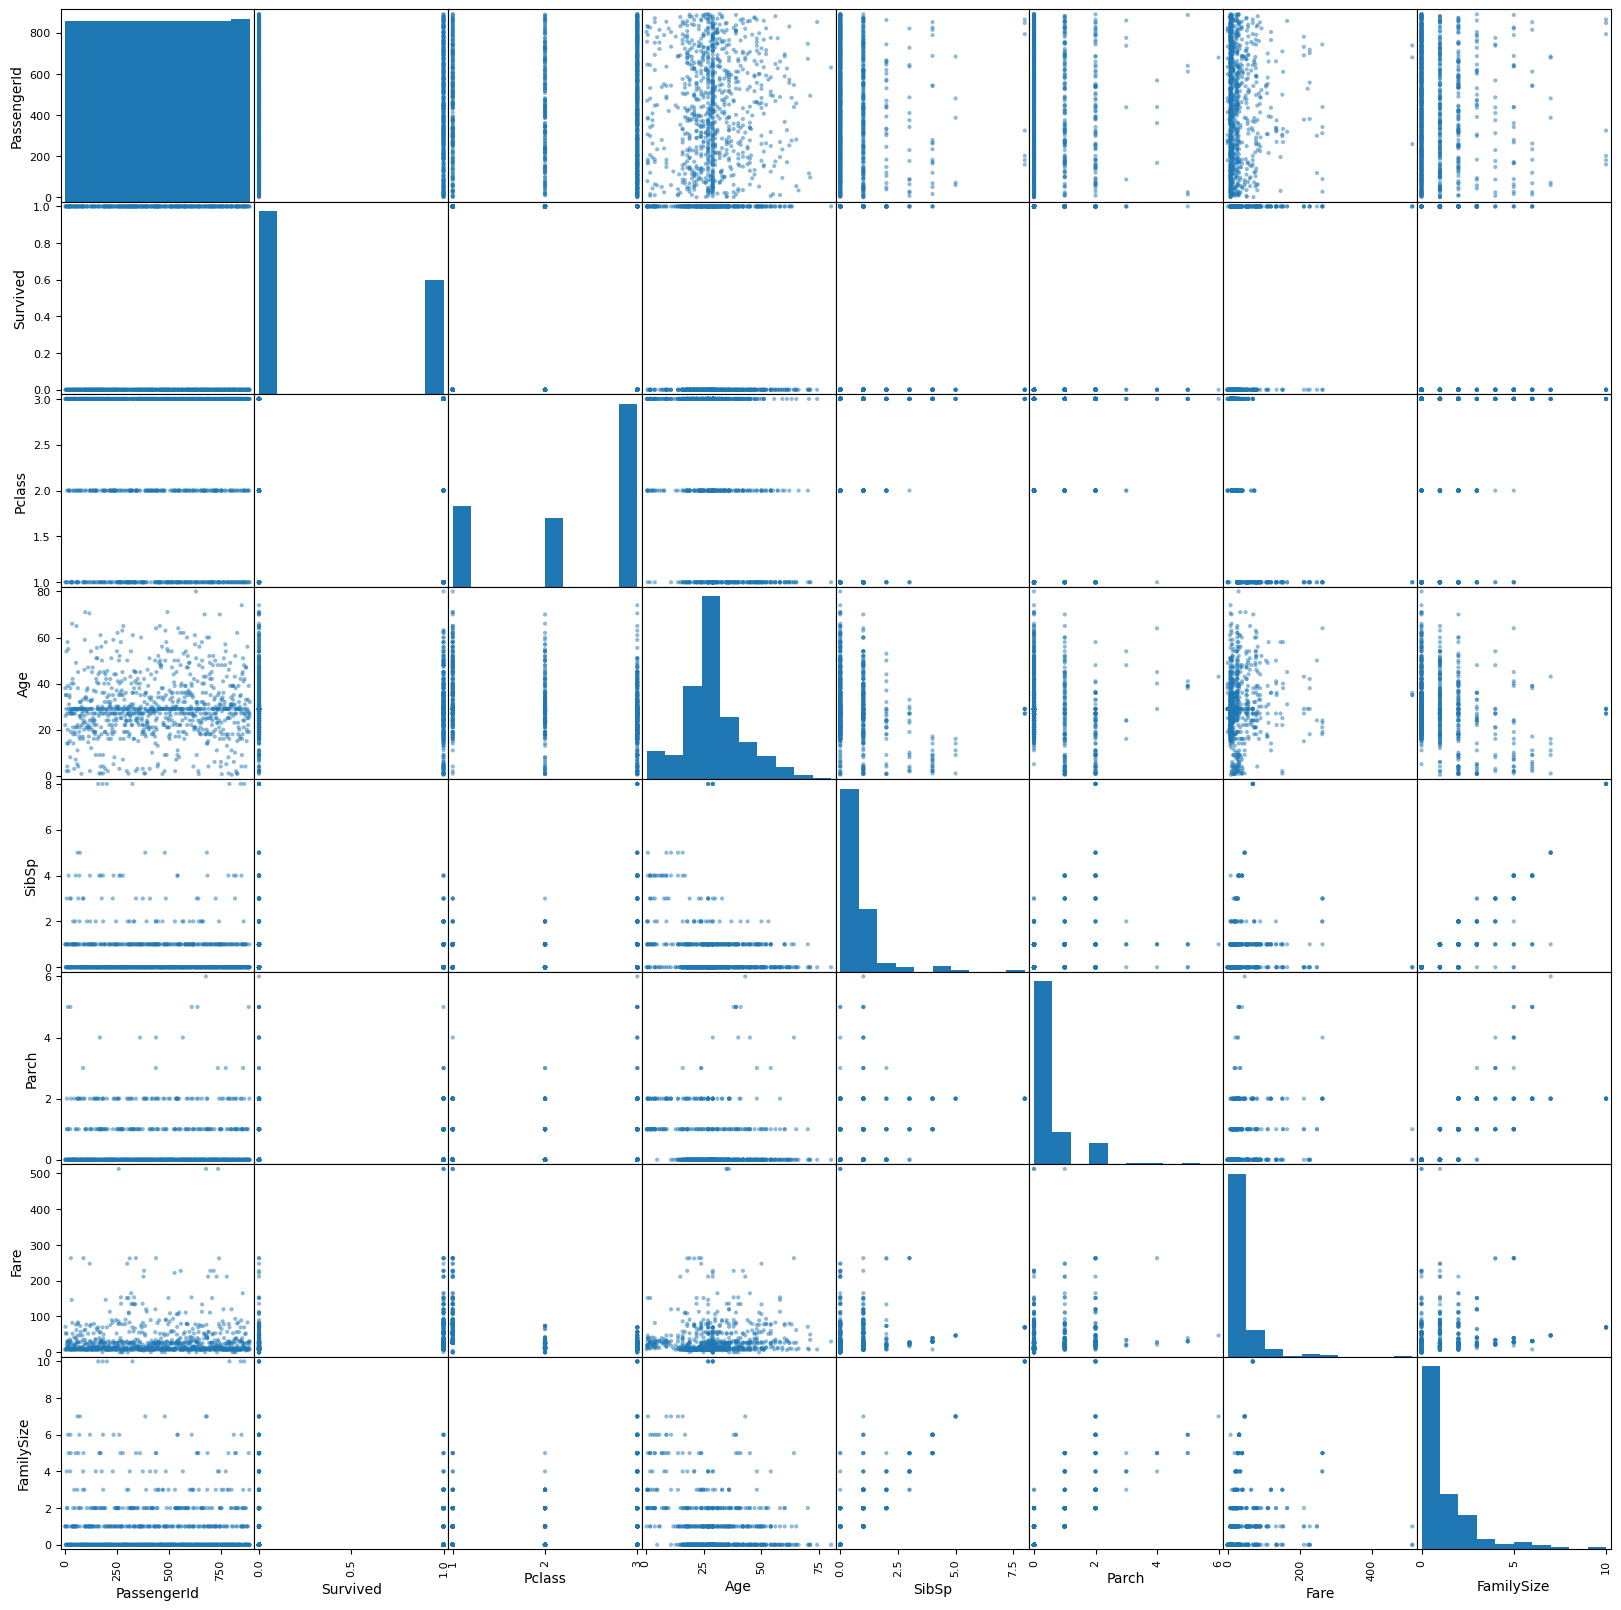

In [468]:
# scatter plot matrix
scatter_matrix(df, figsize=(20,20))


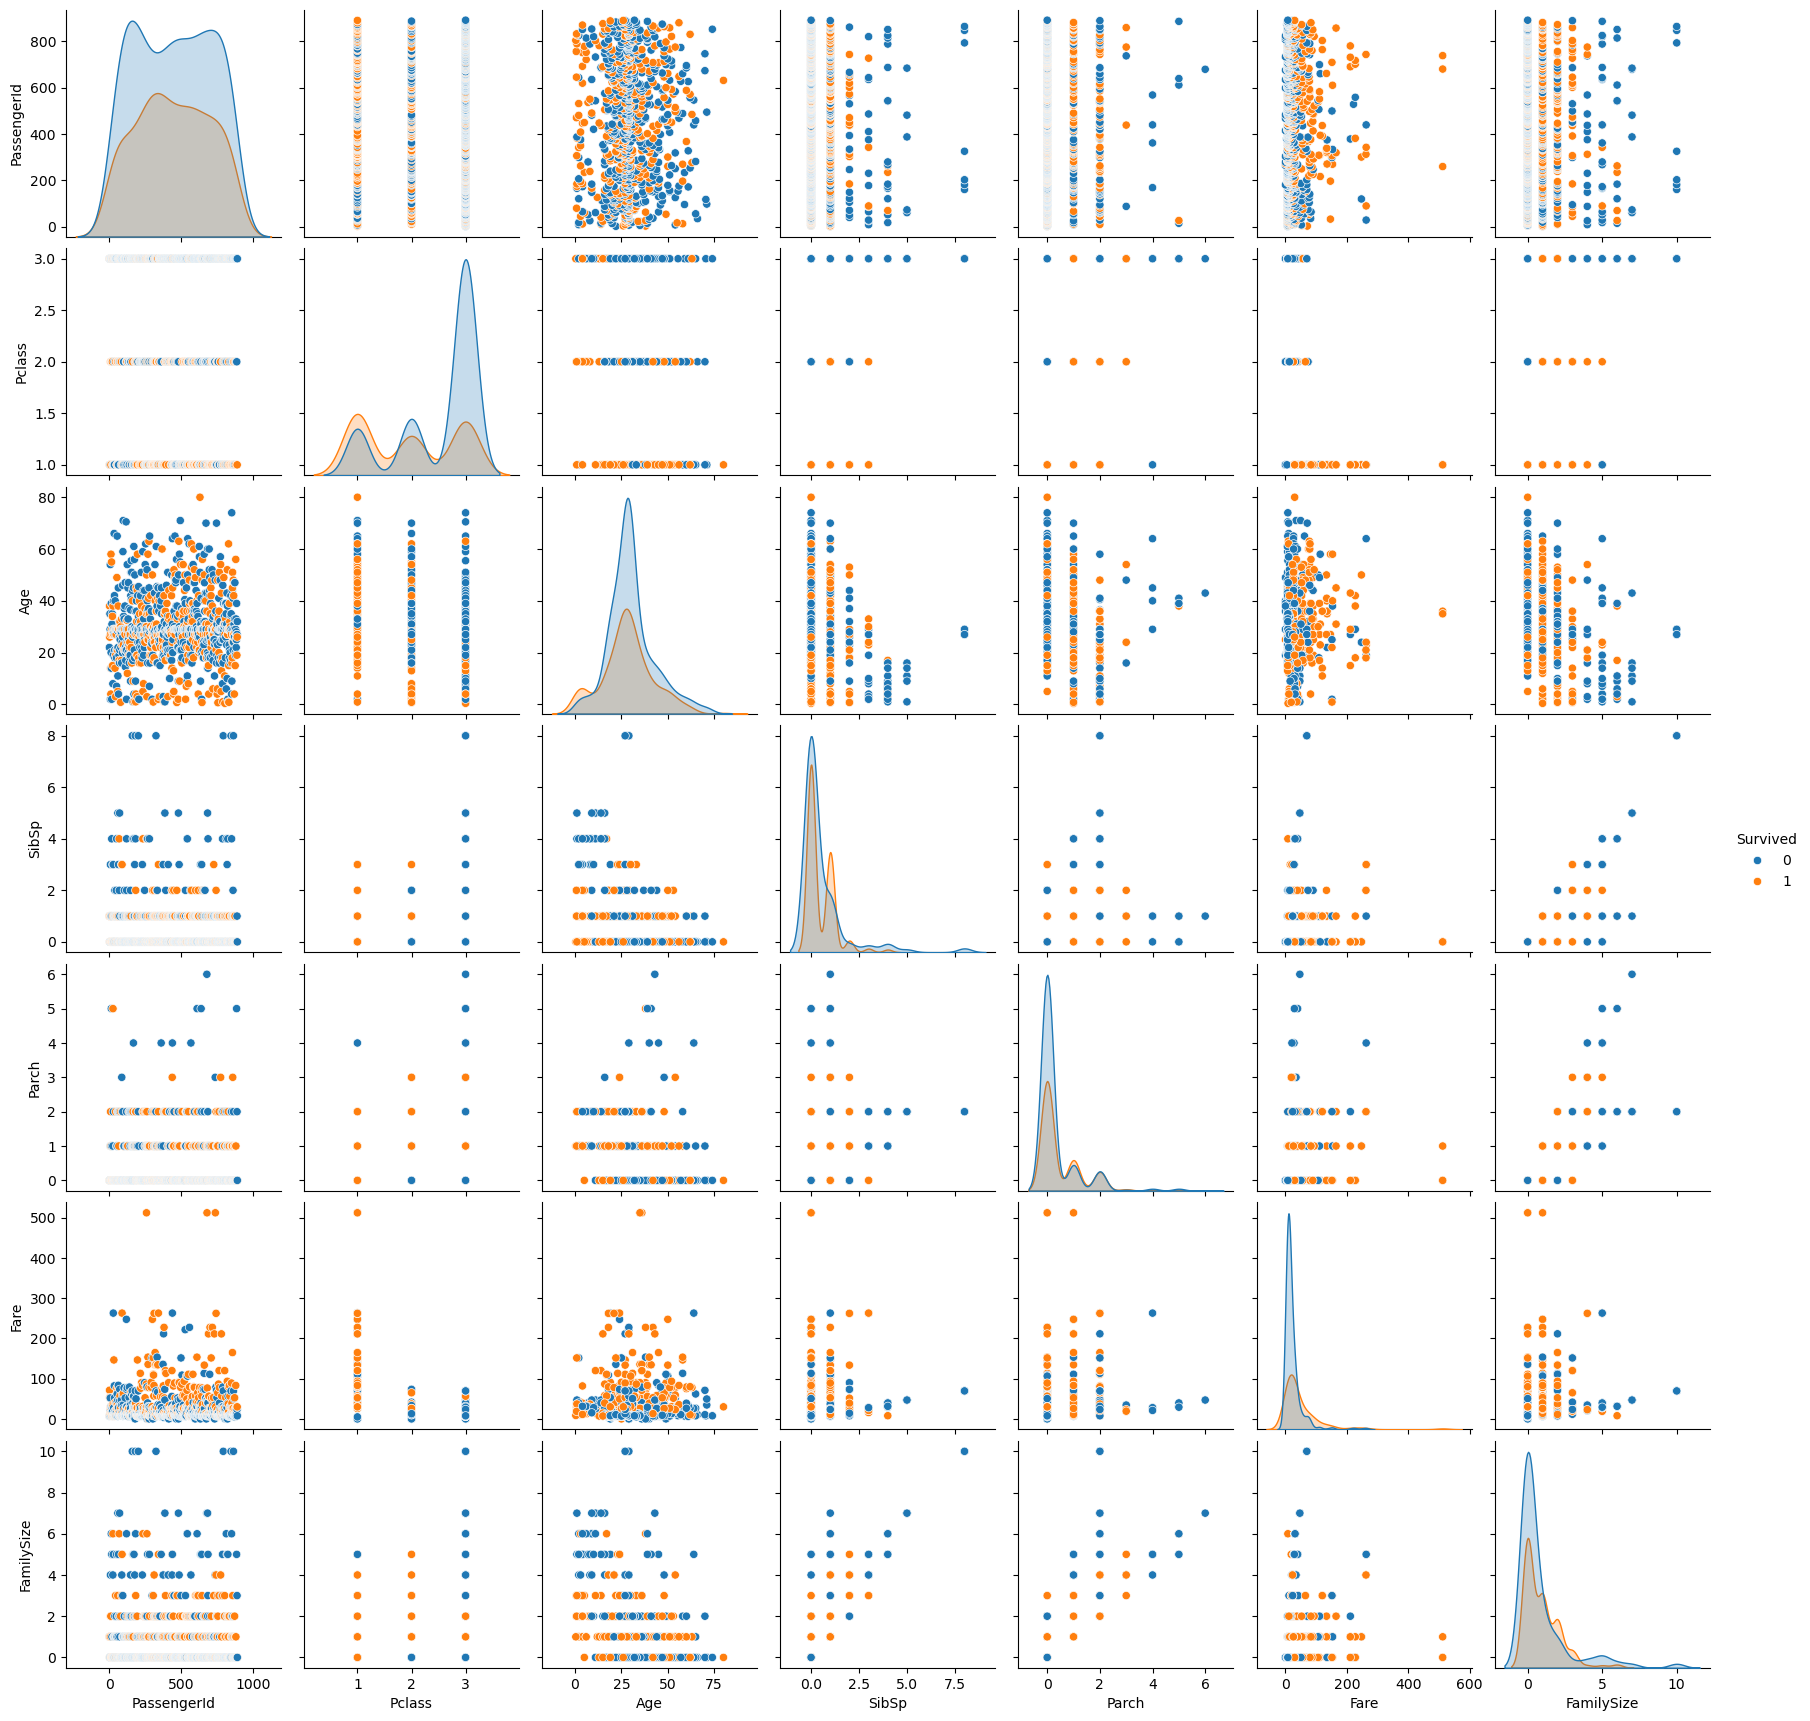

In [469]:
# pairplot
sns.pairplot(data=df, hue='Survived')

In [472]:
#method 2
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.035734,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,0.065997
Age,0.035734,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,-0.249501
SibSp,-0.057527,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.249501,0.890712,0.783111,0.217138,1.000000


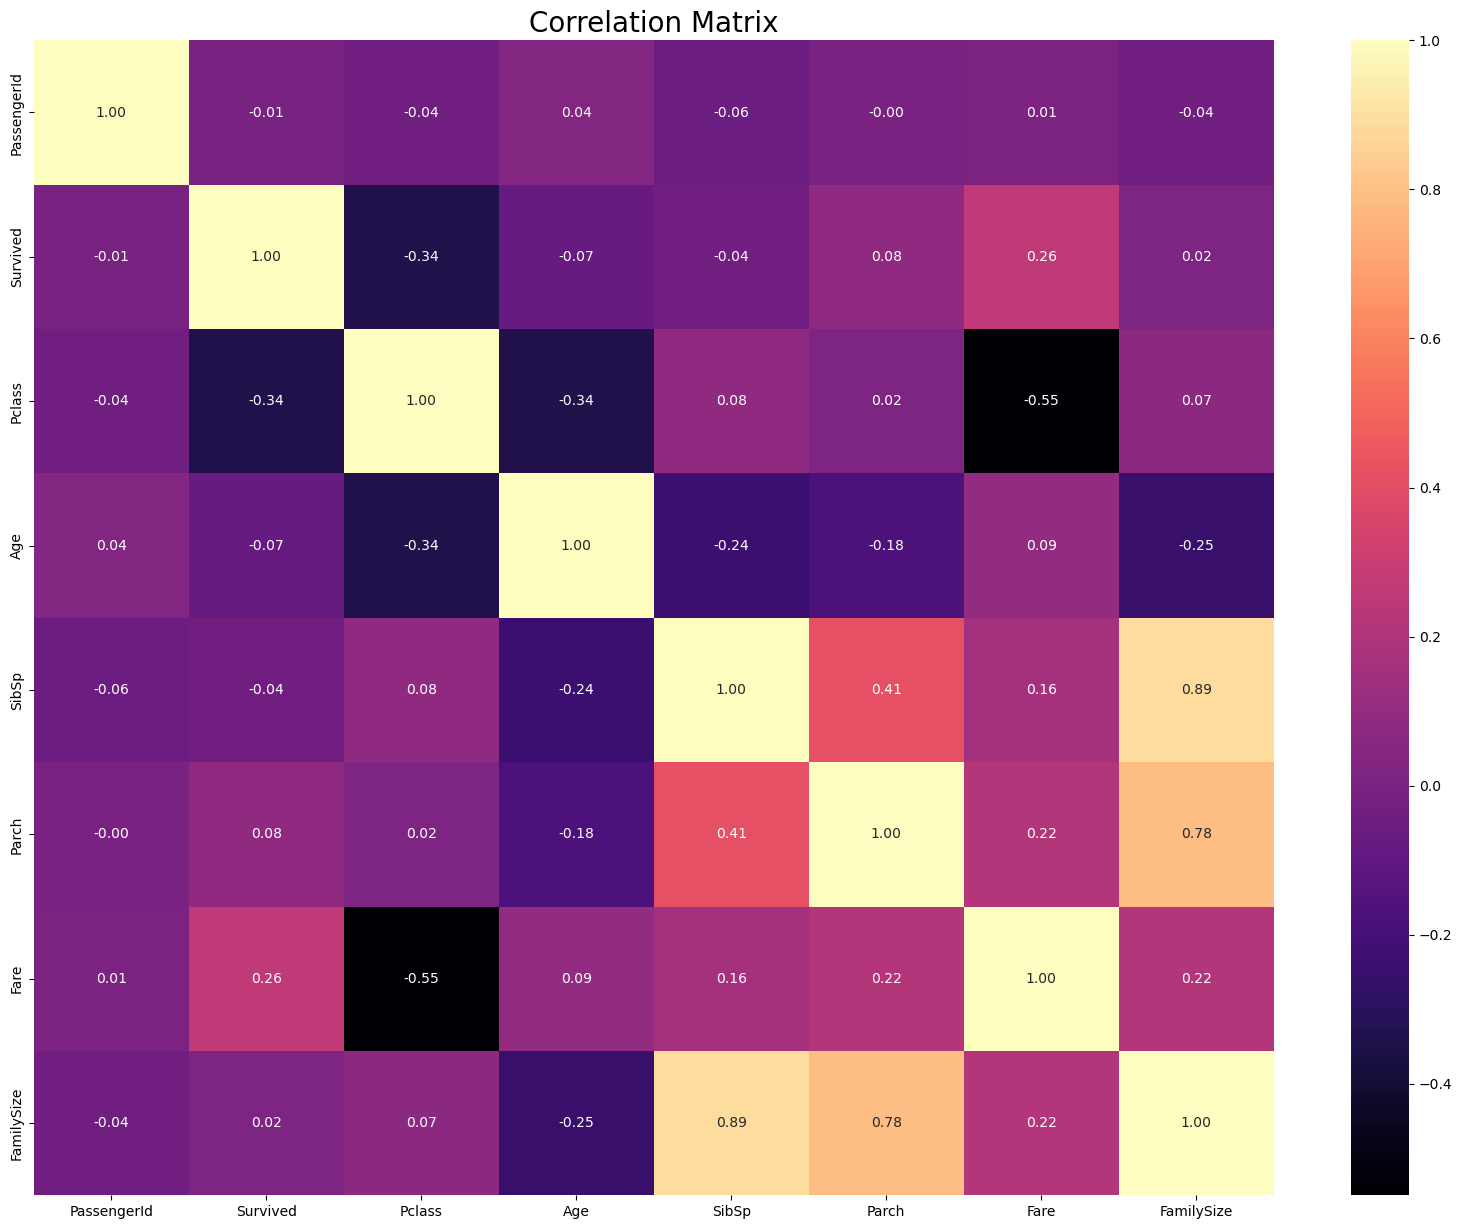

In [473]:
f, ax = plt.subplots(figsize=[20,15])
ax = sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='magma')
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

In [475]:
#Feature Selection

#Categorical
# - Ordinal --> pclass
# - Nominal --> Survived, Name, Sex, Embarked

#Numerical 
# - Continuous - Age, fare
# - discrete - sibsp, parch
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize',
       'LoneStatus', 'FareCategory'],
      dtype='object')

In [489]:
feature_cols = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived', 'FareCategory'], axis=1)


In [476]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Embarked          object
AgeGroup        category
FamilySize         int64
LoneStatus        object
FareCategory    category
dtype: object

In [490]:


numerical_df = feature_cols.select_dtypes(include=['int64', 'float64']).columns
categorical_df = feature_cols.select_dtypes(include=['object']).columns

In [491]:
print(numerical_df)
print(categorical_df)


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize'], dtype='object')
Index(['Sex', 'Embarked', 'LoneStatus'], dtype='object')


In [492]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,LoneStatus,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult,1,With Family,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Age,1,With Family,low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult,0,Alone,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult,1,With Family,low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult,0,Alone,low


<Axes: >

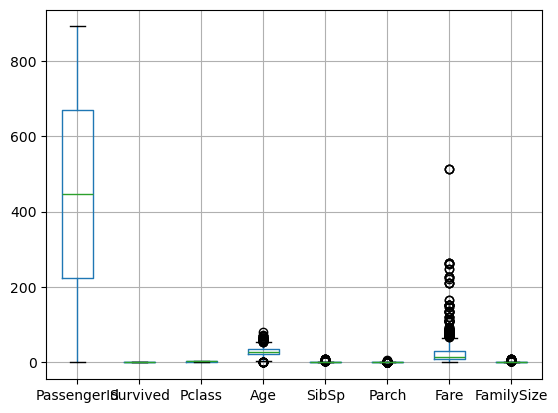

In [493]:
df.boxplot()

<Axes: xlabel='Age'>

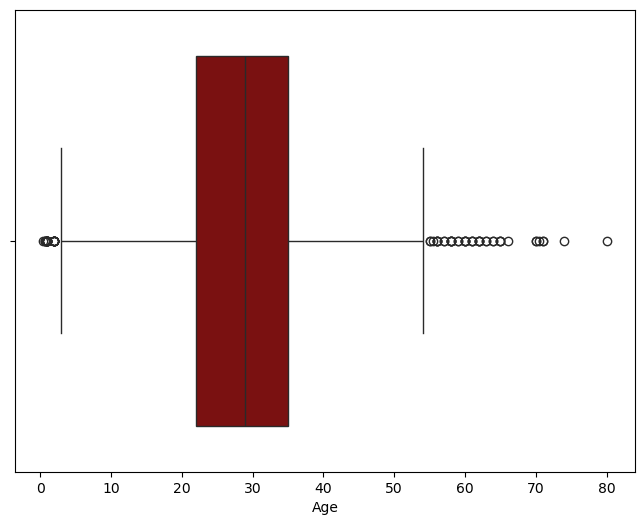

In [496]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df.Age, color='darkred')

In [497]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Age'] >upper, 'Age'] = upper

<Axes: >

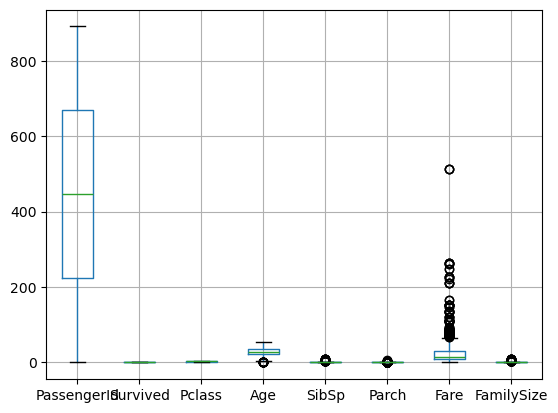

In [498]:
df.boxplot()

In [499]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Age'] >upper, 'Age'] = upper
df.loc[df['Age'] <lower, 'Age'] = lower

In [501]:
Q1 = df.SibSp.quantile(0.25)
Q3 = df.SibSp.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['SibSp'] >upper, 'SibSp'] = upper
df.loc[df['SibSp'] <lower, 'SibSp'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_8120\2809369997.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SibSp'] >upper, 'SibSp'] = upper


In [502]:
Q1 = df.Parch.quantile(0.25)
Q3 = df.Parch.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Parch'] >upper, 'Parch'] = upper
df.loc[df['Parch'] <lower, 'Parch'] = lower

In [503]:
Q1 = df.FamilySize.quantile(0.25)
Q3 = df.FamilySize.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['FamilySize'] >upper, 'FamilySize'] = upper
df.loc[df['FamilySize'] <lower, 'FamilySize'] = lower

C:\Users\USER\AppData\Local\Temp\ipykernel_8120\1992049263.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['FamilySize'] >upper, 'FamilySize'] = upper


<Axes: >

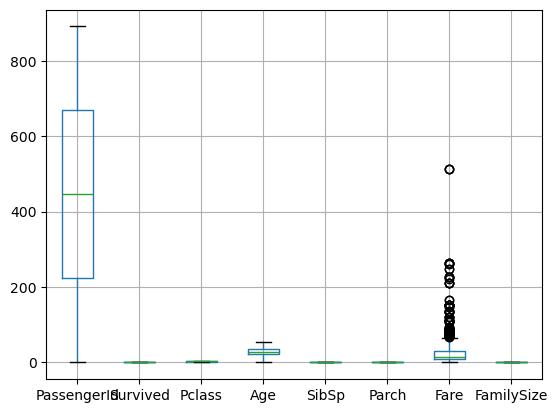

In [504]:
df.boxplot()

In [505]:
Q1 = df.Fare.quantile(0.25)
Q3 = df.Fare.quantile(0.75)
IQR = Q3 - Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Fare'] >upper, 'Fare'] = upper
df.loc[df['Fare'] <lower, 'Fare'] = lower

<Axes: >

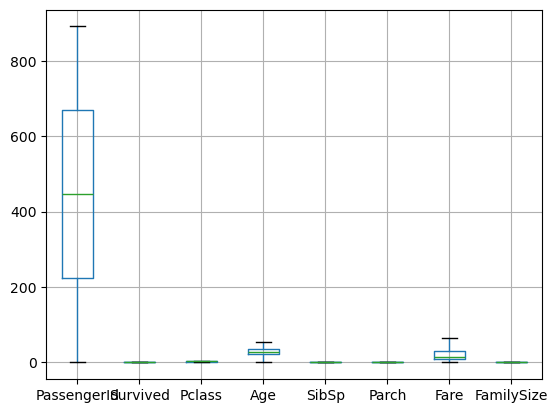

In [506]:
df.boxplot()

In [507]:
df.head(
    
)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,LoneStatus,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S,Adult,1.0,With Family,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C,Middle-Age,1.0,With Family,low
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S,Adult,0.0,Alone,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S,Adult,1.0,With Family,low
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S,Adult,0.0,Alone,low


In [ ]:


# def evaluate_model(model, X_train, y_train, cv_folds=10):
#     """
#     Trains a machine learning model on the provided training data, calculates 
#     the training accuracy and cross-validated accuracy, and returns predictions.

#     Parameters:
#     - model: The machine learning model to train (e.g., RandomForestClassifier()).
#     - X_train: Training feature set (input data).
#     - y_train: Training labels (target data).
#     - cv_folds: Number of cross-validation folds (default is 5).

#     Returns:
#     - train_predictions: Cross-validated predictions for the training set.
#     - training_accuracy: Accuracy of the model on the full training set (without CV).
#     - cross_val_accuracy: Cross-validated accuracy score, averaged over all folds.
#     """

#     # Train the model on the entire training data
#     model.fit(X_train, y_train)
    
#     # Calculate training accuracy (accuracy on the entire training data)
#     training_accuracy = round(model.score(X_train, y_train) * 100, 2)
    
#     # Perform cross-validation to get predictions for each data point
#     train_predictions = cross_val_predict(model, X_train, y_train, cv=cv_folds, n_jobs=-1)
    
#     # Calculate cross-validated accuracy by comparing predictions to actual labels
#     cross_val_accuracy = round(accuracy_score(y_train, train_predictions) * 100, 2)
    
#     return train_predictions, training_accuracy, cross_val_accuracy


In [ ]:
# from sklearn.model_selection import cross_val_score

# def fit_and_score_models(models, X_train, y_train, cv=5):
#     """
#     Fits and scores a list of models using cross-validation.

#     Parameters:
#     - models (dict): A dictionary where keys are model names and values are model instances.
#     - X_train (pd.DataFrame): Training features.
#     - y_train (pd.Series): Training target.
#     - cv (int): Number of cross-validation folds. Default is 5.

#     Returns:
#     - scores (dict): A dictionary where keys are model names and values are mean accuracy scores.
#     """
#     scores = {}
#     for name, model in models.items():
#         # Calculate cross-validation scores
#         model_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
#         # Store the mean score for each model
#         scores[name] = model_scores.mean()
#         print(f"{name} Accuracy: {scores[name]:.4f}")
#     return scores

# # Define the models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
#     "SVM": SVC(kernel='rbf', probability=True, random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42, max_iter=500),
#     "CatBoost": CatBoostClassifier(iterations=500, random_seed=42, verbose=0),
#     "LightGBM": LGBMClassifier(random_state=42)
# }

# # Fit and score the models
# scores = fit_and_score_models(models, X_train, y_train)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def fit_evaluate_and_visualize_models(models, X_train, y_train, cv=5):
#     """
#     Fits, scores, writes a report on each model using cross-validation, and visualizes the results.

#     Parameters:
#     - models (dict): A dictionary with model names as keys and model instances as values.
#     - X_train (pd.DataFrame): Training features.
#     - y_train (pd.Series): Training target.
#     - cv (int): Number of cross-validation folds. Default is 5.

#     Returns:
#     - report_df (pd.DataFrame): A DataFrame summarizing the performance metrics for each model.
#     """
#     report = []

#     for name, model in models.items():
#         print(f"Evaluating {name}...")

#         # Cross-validate and get predictions and probabilities
#         cv_predictions = cross_val_predict(model, X_train, y_train, cv=cv, method="predict")
#         cv_probs = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")[:, 1]

#         # Calculate metrics
#         accuracy = accuracy_score(y_train, cv_predictions)
#         precision = precision_score(y_train, cv_predictions)
#         recall = recall_score(y_train, cv_predictions)
#         f1 = f1_score(y_train, cv_predictions)
#         roc_auc = roc_auc_score(y_train, cv_probs)

#         # Append metrics to report list
#         report.append({
#             "Model": name,
#             "Accuracy": accuracy,
#             "Precision": precision,
#             "Recall": recall,
#             "F1 Score": f1,
#             "ROC AUC": roc_auc
#         })

#         # Print classification report
#         print(f"Classification Report for {name}:\n")
#         print(classification_report(y_train, cv_predictions))
#         print("-" * 50)

#     # Convert report to DataFrame
#     report_df = pd.DataFrame(report)

#     # Visualization
#     plt.figure(figsize=(14, 10))
#     metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
    
#     # Loop through each metric to create subplots
#     for i, metric in enumerate(metrics, 1):
#         plt.subplot(3, 2, i)
#         sns.barplot(x="Model", y=metric, data=report_df, palette="viridis")
#         plt.title(f"{metric} by Model")
#         plt.xticks(rotation=45)
#         plt.ylim(0, 1)  # Setting the y-axis from 0 to 1 for all metrics for consistency

#     plt.tight_layout()
#     plt.show()

#     return report_df

# # Define models dictionary
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
#     "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
#     "SVM": SVC(kernel='rbf', probability=True, random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
#     "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42, max_iter=500),
#     "CatBoost": CatBoostClassifier(iterations=500, random_seed=42, verbose=0),
#     "LightGBM": LGBMClassifier(random_state=42)
# }

# # Fit, evaluate, visualize, and report
# report_df = fit_evaluate_and_visualize_models(models, X_train, y_train)
# print("\nSummary Report:\n", report_df)
